<a href="https://colab.research.google.com/github/teim-projects/Group3_Fouling_Factor_Prediction_in_Heat_Exchanger/blob/main/MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries  
import numpy as np

import matplotlib.pyplot as mtp  
from sklearn import metrics
import pandas as pd
from sklearn import metrics
!pip install ipython-autotime
%load_ext autotime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 10.4 s (started: 2023-02-21 05:41:10 +00:00)


In [ ]:
_
#importing datasets
#col = ["Crude Temp In","Crude Temp Out","CDU1 rate","Crude Flow rate (kg/hr)","Kero Temp In","Kero Temp Out","Kero Flow m3/hr","Furnace inlet temp (deg C)","Crude Temp Increase"," Kero Temp decrease","Q (heat exchanged) MW","Hot-in - Cold-out","Hot-out -Cold-in","LMTD","U transfer rate","Cummulative Flow Tones per day","Fouling Resistance"]
#dataset =  pd.read_csv("HeatEx_Usecase.csv",names = col )
data_set= pd.read_csv('/content/HeatExchangerMLRA.csv')
data_set

,Crude Temp In,Crude Temp Out,CDU1 rate \n(KBPD),Crude Flow rate (kg/hr),Kero Temp In,Kero Temp Out,Kero Flow m3/hr,Furnace inlet temp (deg C),Crude Temp Increase,Kero Temp decrease,Q (heat exchanged) MW,Hot-in - Cold-out,Hot-out -Cold-in,LMTD,U transfer rate,Cummulative Flow Tones per day,Fouling Resistance
0,154.797468,177.4809,92.3039,422179.6756,271.043339,190.6146,136.8106,207.5520,22.683415,80.428749,6.969547,93.562456,35.817122,60.138664,207.988664,1.062216e+05,0.004808
1,161.205191,183.0916,91.9925,420755.3364,273.865702,196.0065,136.6347,210.7414,21.886404,77.859194,6.701976,90.774108,34.801317,58.382904,206.018413,9.608924e+04,0.004854
2,161.716401,182.7077,91.2404,417315.4098,273.570223,195.3727,128.8922,210.1902,20.991333,78.197497,6.375338,90.862489,33.656324,57.600946,198.638082,8.599111e+04,0.005034
3,161.664472,182.4263,91.1133,416734.0860,274.840761,196.3050,127.0754,209.7074,20.761857,78.535805,6.296860,92.414432,34.640484,58.877303,191.939783,7.597554e+04,0.005210
4,160.344884,181.3518,94.0905,430351.1419,277.083239,197.6055,130.7324,208.2693,21.006871,79.477697,6.579352,95.731484,37.260659,61.965087,190.557021,6.597393e+04,0.005248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,147.816959,165.3204,102.7999,470185.9975,287.728616,236.2713,169.0765,187.1293,17.503472,51.457355,5.989529,122.408186,88.454302,104.513625,102.851032,1.405225e+06,0.009723
140,149.264486,166.9163,101.9233,466176.5803,288.575530,238.3488,172.7897,189.3222,17.651789,50.226779,5.988774,121.659255,89.084265,104.527149,102.824769,1.416414e+06,0.009725
141,150.276124,169.3887,100.1238,457946.2988,297.859970,242.2642,166.8212,188.3233,19.112534,55.595815,6.369885,128.471312,91.988030,109.215960,104.672933,1.427404e+06,0.009554
142,150.637563,170.1837,100.7615,460862.7478,300.153481,237.9598,155.0901,186.5770,19.546166,62.193675,6.555895,129.969752,87.322243,107.236312,109.718283,1.438465e+06,0.009114


time: 48.9 ms (started: 2023-02-21 05:41:24 +00:00)


In [ ]:

#Extracting Independent and dependent Variable
print("before spliting")
x= data_set.iloc[:, :-1].values  
y= data_set.iloc[:, 16].values
print(x)

print("after Spliting")


before spliting
[[1.54797468e+02 1.77480900e+02 9.23039000e+01 ... 6.01386636e+01
  2.07988664e+02 1.06221553e+05]
 [1.61205191e+02 1.83091600e+02 9.19925000e+01 ... 5.83829039e+01
  2.06018413e+02 9.60892413e+04]
 [1.61716401e+02 1.82707700e+02 9.12404000e+01 ... 5.76009458e+01
  1.98638082e+02 8.59911132e+04]
 ...
 [1.50276124e+02 1.69388700e+02 1.00123800e+02 ... 1.09215960e+02
  1.04672933e+02 1.42740425e+06]
 [1.50637563e+02 1.70183700e+02 1.00761500e+02 ... 1.07236312e+02
  1.09718283e+02 1.43846496e+06]
 [1.52437754e+02 1.71203700e+02 1.01572400e+02 ... 1.03911074e+02
  1.09584227e+02 1.44961468e+06]]
after Spliting
time: 12.1 ms (started: 2023-02-21 05:41:28 +00:00)


In [ ]:
# Splitting the dataset into training and test set.  

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)



time: 3.56 ms (started: 2023-02-21 05:41:33 +00:00)


In [ ]:

#Fitting the MLR model to the training set:  

regressor= LinearRegression()  
regressor.fit(x_train, y_train)  

LinearRegression()

time: 37.8 ms (started: 2023-02-21 05:41:37 +00:00)


In [ ]:


#Predicting the Test set result;  
y_pred= regressor.predict(x)
y_pred_test_samples = regressor.predict(x_test)
print("Predicted Values : Fouling Resistance")
print(y_pred)
for i in y_pred:
    print(i)


Predicted Values : Fouling Resistance
[0.00444331 0.00465681 0.00503235 0.00528759 0.00518274 0.00579148
 0.00637626 0.00627935 0.00594957 0.00525893 0.00546412 0.00555228
 0.00596952 0.00623842 0.00628231 0.00647811 0.00626081 0.00624918
 0.00635407 0.00688653 0.00706877 0.0069961  0.00710071 0.0070986
 0.00653096 0.00643108 0.00645992 0.00699875 0.00723581 0.00743419
 0.00727692 0.00709447 0.00745158 0.00757103 0.00748783 0.00719588
 0.00735275 0.0067001  0.00663113 0.00694556 0.00680696 0.00727729
 0.00724377 0.00710015 0.00710273 0.00724735 0.00754955 0.00740442
 0.00731154 0.0079641  0.00779711 0.00766106 0.00725065 0.00737209
 0.00752417 0.00765528 0.00795544 0.00768918 0.00761411 0.00794325
 0.00792351 0.00726753 0.00759638 0.00762074 0.0075977  0.00771552
 0.00830146 0.00832817 0.00823947 0.00815104 0.00789671 0.00802557
 0.00801259 0.00797305 0.00810594 0.00807297 0.0076225  0.00728968
 0.00725853 0.00716666 0.0071862  0.00701917 0.00711696 0.00755729
 0.00790448 0.00788274 0.

In [ ]:
data_set=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_test_samples})
#data_set['Actual']
for i in y_test:
  print(i)

0.005974337
0.008281602
0.008551236
0.006524089
0.008029314
0.008778361
0.008004606
0.006976496
0.009031351
0.006231784
0.008220105
0.009220174
0.006757648
0.007225485
0.007441072
0.007401096
0.00653598
0.005805542
0.008813333
0.00768688
0.007900192
0.008236517
0.006719208
0.009188375
0.00710002
0.007775773
0.0075623
0.009725283
0.008491901
time: 8.64 ms (started: 2023-02-21 05:42:10 +00:00)


In [ ]:
#Measuring parameters for accuray

print('Train Score: ', regressor.score(x_train, y_train))  
print('Test Score: ', regressor.score(x_test, y_test)) 
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, y_pred_test_samples))
print("Mean squared Error  : ", metrics.mean_squared_error(y_test,y_pred_test_samples))
print("Root Mean Squared Error :", np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_samples)))

Train Score:  0.9899479308492503
Test Score:  0.9903129740889284
Mean Absolute Error :  7.530641999857258e-05
Mean squared Error  :  9.976047839040096e-09
Root Mean Squared Error : 9.988016739593549e-05
time: 10.6 ms (started: 2023-02-21 05:42:15 +00:00)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


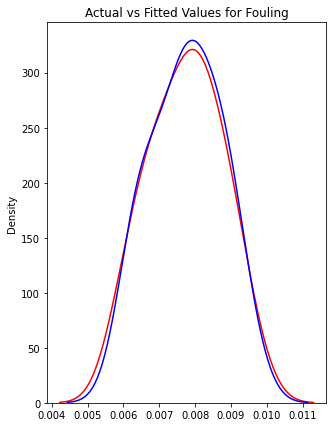

time: 577 ms (started: 2023-02-21 05:42:19 +00:00)


In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_test_samples, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Fouling')


plt.show()
plt.close()

In [ ]:
errors = abs(y_pred_test_samples - y_test)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.99 %.
time: 3.57 ms (started: 2023-02-21 05:42:26 +00:00)


In [ ]:
print("(R^2) Score:", round(metrics.r2_score(y_test, y_pred_test_samples), 4))

(R^2) Score: 0.9903
time: 1.63 ms (started: 2023-02-21 05:42:28 +00:00)
